In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns
from pandas import read_csv
from matplotlib import pyplot

Populating the interactive namespace from numpy and matplotlib


# About the dataset

The dataset has 11 variables describing each person's Twiiter Activity. These variables are: 
- Follower Count: Number of followers of the person on Twitter
- Follwoing Count: Number of Twitter users the person follows 
- Listed Count: Number of people that have added the person to a list
- Mentions Received: Number of times people have mentioned (@) the person
- Retweets Received: Number of times a tweet was retweeted
- Mentions Sent: Number of times the person mentioned (@) someone
- Retweets Sent: Number of times the person retweet a tweet
- Posts: Number of posts 
- Network Feature 1, 2, 3: Local follower network of the person  

In [3]:
# Load data 
Twitter_Train = pd.read_csv("/Users/shimonyagrawal/Desktop/Social Media Analytics/train.csv")
Twitter_Train 

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0,41765,185,1356,1529.643058,282.858500,76.809514,5.392171,104.438625,3307,...,1370,15143,6881.482996,5013.642295,22.683131,2.385538,18.420981,23958,21.324988,1413.825398
5496,1,112,243,5,1.445174,0.100503,0.100503,0.100503,0.603177,5,...,479,8,0.306073,0.306073,0.100503,0.100503,1.621981,1,49.000000,4969.000000
5497,0,15385,673,747,55.993546,22.321945,6.946233,0.341936,6.503977,202,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907
5498,0,265258,209,551,631.915946,457.648550,5.460985,0.100503,7.498126,2603,...,37601,22232,176.533716,42.330221,6.849227,1.345073,4.359865,696,234.338068,7168.464489


In [4]:
Twitter_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Choice               5500 non-null   int64  
 1   A_follower_count     5500 non-null   int64  
 2   A_following_count    5500 non-null   int64  
 3   A_listed_count       5500 non-null   int64  
 4   A_mentions_received  5500 non-null   float64
 5   A_retweets_received  5500 non-null   float64
 6   A_mentions_sent      5500 non-null   float64
 7   A_retweets_sent      5500 non-null   float64
 8   A_posts              5500 non-null   float64
 9   A_network_feature_1  5500 non-null   int64  
 10  A_network_feature_2  5500 non-null   float64
 11  A_network_feature_3  5500 non-null   float64
 12  B_follower_count     5500 non-null   int64  
 13  B_following_count    5500 non-null   int64  
 14  B_listed_count       5500 non-null   int64  
 15  B_mentions_received  5500 non-null   f

In [5]:
Twitter_Train.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,...,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,...,12738.259818,5903.148364,2.554598e+03,997.149954,6.099658,1.106236,9.505821,5254.933636,85.024196,3745.175480
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,...,50054.520874,16298.462018,2.508873e+04,9342.006880,9.729557,1.939914,19.424680,26778.820125,106.689384,5518.399590
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,...,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,...,322.000000,75.000000,3.260473e+00,0.714556,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,...,773.000000,890.000000,4.876542e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2206.420734
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,...,2838.000000,6734.000000,3.743699e+02,107.081021,6.866840,1.320681,10.600502,1323.000000,112.191489,4349.908608
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,...,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


In [6]:
print("Any missing values in the dataset:", Twitter_Train.isnull().values.any())

Any missing values in the dataset: False


[Text(0.5, 0, 'A_follower_count'),
 Text(1.5, 0, 'A_following_count'),
 Text(2.5, 0, 'A_listed_count'),
 Text(3.5, 0, 'A_mentions_received'),
 Text(4.5, 0, 'A_retweets_received'),
 Text(5.5, 0, 'A_mentions_sent'),
 Text(6.5, 0, 'A_retweets_sent'),
 Text(7.5, 0, 'A_posts'),
 Text(8.5, 0, 'A_network_feature_1'),
 Text(9.5, 0, 'A_network_feature_2'),
 Text(10.5, 0, 'A_network_feature_3')]

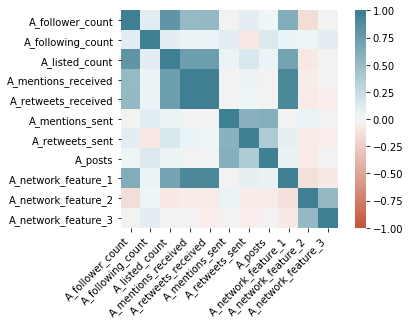

In [7]:
# Testing the correlation 

correlationA = Twitter_Train .iloc[:,1:12].corr(method = 'pearson')
correlationA

ax = sns.heatmap( 
    correlationA, 
    vmin=-1, vmax=1, center=0, 
    cmap=sns.diverging_palette(20, 220, n = 200),
    square=True,
)
ax.set_xticklabels(  
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right'
)

[Text(0.5, 0, 'B_follower_count'),
 Text(1.5, 0, 'B_following_count'),
 Text(2.5, 0, 'B_listed_count'),
 Text(3.5, 0, 'B_mentions_received'),
 Text(4.5, 0, 'B_retweets_received'),
 Text(5.5, 0, 'B_mentions_sent'),
 Text(6.5, 0, 'B_retweets_sent'),
 Text(7.5, 0, 'B_posts'),
 Text(8.5, 0, 'B_network_feature_1'),
 Text(9.5, 0, 'B_network_feature_2'),
 Text(10.5, 0, 'B_network_feature_3')]

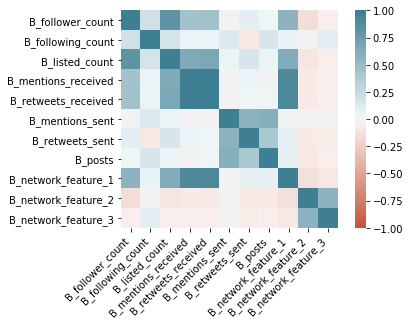

In [8]:
correlationB = Twitter_Train.iloc[:,12:23].corr(method='pearson')
correlationB

ax = sns.heatmap(
    correlationB, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n = 200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# Applying Machine Learning Models to identify key predictors of Social Influence

In [65]:
# To prepare the dataset for machine learning models, the dataset is divided into Test data and Train data. By creating a train and test split of your dataset helps in quickly evaluating the performance of an algorithm on your problem. The training dataset is used to prepare a model, to train it and the test dataset is new data where the output values are withheld from the algorithm. Transforming A and B individuals into A-B variables for better interpretation of the model.For the test data, values are selected from the data. For the train data, one variable is chosen to build the model. Here, the model is built upon the variable "choice". 

x = pd.DataFrame(Twitter_Train.iloc[:,1:10].values - Twitter_Train.iloc[:,10:19].values)
x.columns = ['A/B_follower_count','A/B_following_count','A/B_listed_count','A/B_retweets_received',
             'A/B_mentions_sent','A/B_retweets_sent','A/B_posts','A/B_network_feature_2','A/B_network_feature_3']
y= Twitter_Train['Choice']

In [18]:
# The train_test_split function is for splitting a single dataset for two different purposes: training and testing. The testing subset is for building your model. The testing subset is for using the model on unknown data to evaluate the performance of the model.

from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split (x, y, test_size = 0.30, random_state = 42)

In [19]:
# Looking at the shape of the data to test whether training features number of columns match testing feature number of columns.The number of rows to match for the respective training and testing features and the labels

print('X_Train Shape:', x_train.shape)
print('Y_Train Shape:', y_train.shape)
print('X_Test Shape:', x_test.shape)
print('Y_Test Shape:', y_test.shape)

X_Train Shape: (3850, 9)
Y_Train Shape: (3850,)
X_Test Shape: (1650, 9)
Y_Test Shape: (1650,)


In [8]:
# Spot Check Algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('Xgboost', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.709091 (0.014693)
KNN: 0.737662 (0.016054)
CART: 0.700000 (0.019653)
RF: 0.757662 (0.016470)
NB: 0.547273 (0.013196)
SVM: 0.523117 (0.006989)
Xgboost: 0.772987 (0.021831)


In [21]:
# Logtistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE
 

model_logreg = LogisticRegression()
rfe = RFE(model_logreg, 9)
rfe = rfe.fit(x_train, y_train.values.ravel())
print(rfe.support_)  #Indicates all variables have been selected by RFE with a ranking of 1 
print(rfe.ranking_)   

[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]


In [22]:
import statsmodels.api as sm

logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.625624
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.097      
Dependent Variable:  Choice            AIC:               6899.8665  
Date:                2020-07-06 12:17  BIC:               6959.3790  
No. Observations:    5500              Log-Likelihood:    -3440.9    
Df Model:            8                 LL-Null:           -3811.3    
Df Residuals:        5491              LLR p-value:       1.1797e-154
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      6.0000                                          
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
A/B_follower_count     0.0000   0.0000 11.5580 0.0000  0.0000  0.0000
A/B_following_co

In [23]:
# Removing variables with p-values greater than 0.05 to improve the model 

columns_to_keep = ['A/B_follower_count', 'A/B_retweets_received', 'A/B_mentions_sent', 
                   'A/B_network_feature_2', 'A/B_network_feature_3']
x = x_train[columns_to_keep]
y = y_train 

logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.618079
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.108      
Dependent Variable:  Choice            AIC:               4769.2079  
Date:                2020-07-06 12:17  BIC:               4800.4870  
No. Observations:    3850              Log-Likelihood:    -2379.6    
Df Model:            4                 LL-Null:           -2667.5    
Df Residuals:        3845              LLR p-value:       2.7700e-123
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      6.0000                                          
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
A/B_follower_count     0.0000   0.0000 10.5261 0.0000  0.0000  0.0000
A/B_retweets_rec

In [24]:
# Logistic Regression Model Fitting 

model_logreg.fit(x_train, y_train)

# Predicting test results 

y_pred = model_logreg.predict(x_test)

In [50]:
# Calculating the accuracy of our model 

print("Training accuracy of Logistic Regression model:", model_logreg.score(x_train, y_train))
print("Testing accuracy of Logistic Regression model:", model_logreg.score(x_test, y_test))

Training accuracy of Logistic Regression model: 0.7103896103896103
Testing accuracy of Logistic Regression model: 0.7260606060606061


The difference between training and testing accuracy indicates how much the model has overfitted. The Logistic Regression model has a low overfitting value of 0.02 which indicates the model has not trained data too well to negatively impact the performance.

In [26]:
# Confusion Matrix 

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix (y_test,y_pred)
print(confusion_matrix).

[[674 146]
 [306 524]]


The confusion matrix visualises the actual and predicted values of the data thereby depicting the performance of a supervised algorithm. Here, it can be inferred that there are 1,198 correct predictions and 452 incorrect predictions. 

In [28]:
# Classification report will summarise our model by computing precision, recall, f-measure and support 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       820
           1       0.78      0.63      0.70       830

    accuracy                           0.73      1650
   macro avg       0.73      0.73      0.72      1650
weighted avg       0.74      0.73      0.72      1650



In social media analytics, high precision means that an algorithm returned more relevant results than irrelevant, while high recall means that an algorithm returned most of the relevant results. In the logistic regression model, there is a 74% precision that there are more relevant values and a 73% recall that most of the relevant values are included in our model.

In [30]:
# Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train) #Train the model on training data 

# Predicting the test results 
  
y_pred = model_rf.predict(x_test)

In [49]:
# Calculating the accuracy of our model  

print("Training accuracy of Random Forest model:", model_rf.score(x_train, y_train))
print("Testing accuracy of Random Forest model:", model_rf.score(x_test, y_test))

Training accuracy of Random Forest model: 0.9937662337662337
Testing accuracy of Random Forest model: 0.7751515151515151


In [21]:
# To interpret the model and report the results, feature importances is used to quantify how much a particular variable improves predctions 

feature_importances = pd.DataFrame(model_rf.feature_importances_,
                          index = x_train.columns, 
                          columns = ['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
A/B_mentions_sent,0.160686
A/B_network_feature_3,0.146603
A/B_follower_count,0.135332
A/B_listed_count,0.127699
A/B_retweets_sent,0.119870
A/B_posts,0.093620
A/B_retweets_received,0.078480
A/B_network_feature_2,0.075339
A/B_following_count,0.062370


In [23]:
# Select features with importance larger than 0.08 

columns_to_keep = ['A/B_mentions_sent', 'A/B_listed_count', 'A/B_follower_count', 
                   'A/B_network_feature_3', 'A/B_retweets_sent', 'A/B_posts']

x = x_train[columns_to_keep]
y = y_train 

model_rf = RandomForestClassifier() #New random forest classifier for the most important features 
model_rf.fit(x_train, y_train) #Train the model on training data 

# Predicting the test results 

y_pred = model_rf.predict(x_test)

In [33]:
# Calculating the accuracy of the model 

print("Training accuracy of Random Forest model:", model_rf.score(x_train, y_train))
print("Testing accuracy of Random Forest model:", model_rf.score(x_test, y_test))

Training accuracy of Random Forest model: 0.9937662337662337
Testing accuracy of Random Forest model: 0.7751515151515151


The difference between training and testing accuracy indicates how much the model has overfitted. The Random Forest model has a low overfitting value of 0.22 which indicates the model has not trained data too well to negatively impact the performance.

In [34]:
# Confusion Matrix 

from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix (y_test,y_pred)
print(conf_matrix)

[[629 191]
 [180 650]]


The confusion matrix visualises the actual and predicted values of the data thereby depicting the performance of a supervised algorithm. Here, it can be inferred that there are 1,274 correct predictions and 376 incorrect predictions. 

In [35]:
# Classification report will summarise our model by computing precision, recall, f-measure and support 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       820
           1       0.77      0.78      0.78       830

    accuracy                           0.78      1650
   macro avg       0.78      0.78      0.78      1650
weighted avg       0.78      0.78      0.78      1650



In social media analytics, high precision means that an algorithm returned more relevant results than irrelevant, while high recall means that an algorithm returned most of the relevant results. In the Random Forest model, there is a 78% precision that there are more relevant values and a 78% recall that most of the relevant values are included in our model.

In [36]:
# K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
model_knn.fit(x_train, y_train)

y_pred = model_knn.predict(x_test)

In [37]:
# Calculating training and testing of our model

print("Training accuracy of K-Nearest Neighbors model:", model_knn.score(x_train, y_train))
print("Testing accuracy of K-Nearest Neighbors model:", model_knn.score(x_test, y_test))

Training accuracy of K-Nearest Neighbors model: 0.818961038961039
Testing accuracy of K-Nearest Neighbors model: 0.7412121212121212


The difference between training and testing accuracy indicates how much the model has overfitted. The KNN model has a low overfitting value of 0.07 which indicates the model has not trained data too well to negatively impact the performance.

In [38]:
# Confusion Matrix 

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[583 237]
 [190 640]]


The confusion matrix visualises the actual and predicted values of the data thereby depicting the performance of a supervised algorithm. Here, it can be inferred that there are 1,223 correct predictions and 427 incorrect predictions. 

In [39]:
# Classification report will summarise our model by computing precision, recall, f-measure and support 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       820
           1       0.73      0.77      0.75       830

    accuracy                           0.74      1650
   macro avg       0.74      0.74      0.74      1650
weighted avg       0.74      0.74      0.74      1650



In social media analytics, high precision means that an algorithm returned more relevant results than irrelevant, while high recall means that an algorithm returned most of the relevant results. In the KNN model, there is a 74% precision that there are more relevant values and a 74% recall that most of the relevant values are included in our model.

In [42]:
# XGBoost Classifier 

from xgboost import XGBClassifier
from xgboost import plot_importance

model_xgb = XGBClassifier(max_depth = 2, 
                          objective = 'binary:logistic',
                          eta = 0.3
                         )
model_xgb

model_xgb.fit(x_train, y_train)
print(model_xgb)

y_pred = model_xgb.predict(x_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


Training accuracy of XGBoost model: 0.7958441558441558
Testing accuracy of XGBoost model: 0.7824242424242425


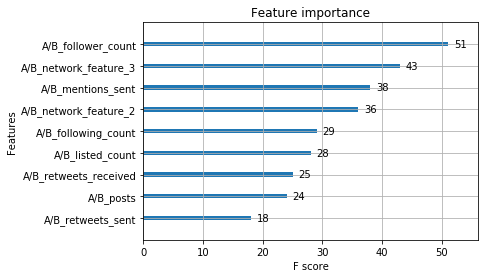

In [43]:
# Calculating training and testing of our model

print("Training accuracy of XGBoost model:", model_xgb.score(x_train, y_train))
print("Testing accuracy of XGBoost model:", model_xgb.score(x_test, y_test))


plot_importance(model_xgb, max_num_features=9)
pyplot.show()

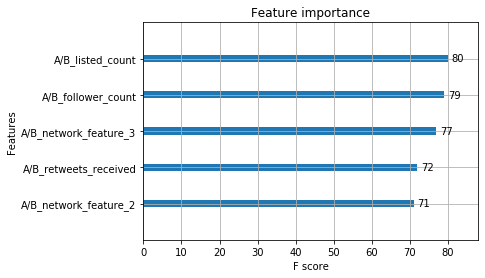

In [44]:
# Select the top 5 features and re-run the model 

from sklearn.metrics import confusion_matrix, classification_report

cols = ['A/B_follower_count','A/B_network_feature_3','A/B_listed_count',  
        'A/B_network_feature_2','A/B_retweets_received' ]
x = x_train[cols]
y = y_train 


model_xgb = XGBClassifier() #New xgb classifier for the most important features 
model_xgb.fit(x_train, y_train) #Train the model on training data 

#Predicting the test results

y_pred = model_xgb.predict(x_test)

plot_importance(model_xgb, max_num_features=5)
pyplot.show()

In [48]:
# Calculating the accuracy of the model 

print("Training accuracy of XGBoost model:", model_xgb.score(x_train, y_train))
print("Testing accuracy of XGBoost model:", model_xgb.score(x_test, y_test))

Training accuracy of XGBoost model: 0.8166233766233766
Testing accuracy of XGBoost model: 0.7866666666666666


The difference between training and testing accuracy indicates how much the model has overfitted. The XGBoost model has a low overfitting value of 0.03 which indicates the model has not trained data too well to negatively impact the performance.

In [46]:
# Confusion Matrix 

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[636 184]
 [168 662]]


The confusion matrix visualises the actual and predicted values of the data thereby depicting the performance of a supervised algorithm. Here, it can be inferred that there are 1,298 correct predictions and 352 incorrect predictions. 

In [47]:
# Classification report will summarise our model by computing precision, recall, f-measure and support 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       820
           1       0.78      0.80      0.79       830

    accuracy                           0.79      1650
   macro avg       0.79      0.79      0.79      1650
weighted avg       0.79      0.79      0.79      1650



In social media analytics, high precision means that an algorithm returned more relevant results than irrelevant, while high recall means that an algorithm returned most of the relevant results. In the XGBoost model, there is a 79% precision that there are more relevant values and a 79% recall that most of the relevant values are included in our model.

I tried 4 models on the dataset: Logistic Regression, Random Forest, K-Nearest Neighbors and XGBoost. On comparing these models, XGBoost has the highest training and testing accuracy of 81% and 79% respectively. Further, on analyzing the confusion matrix, XGBoost model has the highest number of correctly predicted values (1,298). Lastly, according to the classification report, XGBoost model has the highest precision, recall and f-measure (79%) indicating that the model selected more relevant values than irrelevants values as well as the most relevant values in the dataset have been included in our model. Therefore, the key predictors of social influence according to XGBoost model are: A/B_listed_count, A/B_follower_count, A/B_network_feature_3, A/B_retweets_received and A/B_network_feature_2.This data can be used by companies in choosing most influencial people on media to partner with. 